In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('restaurant-1-orders.csv')

In [3]:
df.head()

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6


the data has multiple rows for a single order. "order date" column should be separated and sorted. Can also make a recommendation (accompanying items) for complimentory items in a group order.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Number    74818 non-null  int64  
 1   Order Date      74818 non-null  object 
 2   Item Name       74818 non-null  object 
 3   Quantity        74818 non-null  int64  
 4   Product Price   74818 non-null  float64
 5   Total products  74818 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.4+ MB


In [5]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format='%d/%m/%Y %H:%M')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Number    74818 non-null  int64         
 1   Order Date      74818 non-null  datetime64[ns]
 2   Item Name       74818 non-null  object        
 3   Quantity        74818 non-null  int64         
 4   Product Price   74818 non-null  float64       
 5   Total products  74818 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 3.4+ MB


In [7]:
df['Item Name'].unique().size

248

Task 1: To predict what dishes will be ordered in the last week of every month and in what quantity? 
Task 2: In a single order, which items are likely to be grouped?
Task 3: Can we make seasonal cluster of items?
Task 4: Collaborative recommendation
Task 5: How does price play a role?

In [8]:
df.sort_values(by='Order Date', inplace=True)

In [9]:
df.describe()

,Order Number,Order Date,Quantity,Product Price,Total products
count,74818.000000,74818,74818.000000,74818.000000,74818.000000
mean,9115.638162,2018-03-02 17:05:07.154962688,1.243564,5.286492,6.931434
min,630.000000,2015-09-01 14:42:00,1.000000,0.500000,1.000000
25%,5590.000000,2017-06-02 17:43:00,1.000000,2.950000,5.000000
50%,9103.000000,2018-04-06 19:53:00,1.000000,3.950000,6.000000
75%,12630.000000,2018-12-23 18:36:00,1.000000,8.950000,8.000000
max,16118.000000,2019-08-03 20:25:00,51.000000,17.950000,60.000000
std,4052.210452,NaN,0.798207,3.338221,3.954832


In [10]:
dfd = pd.DataFrame()

In [11]:
dfd = df.drop_duplicates(subset=['Item Name'])

In [12]:
dfd.drop(['Order Number', 'Order Date', 'Quantity', 'Total products'], axis=1, inplace=True)

/var/folders/sz/4dnyt_zd7_v7g39gxc4lz3000000gn/T/ipykernel_4408/209204372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd.drop(['Order Number', 'Order Date', 'Quantity', 'Total products'], axis=1, inplace=True)


In [13]:
dfd.reset_index(drop=True, inplace=True)

In [14]:
dfd

,Item Name,Product Price
0,Onion Bhaji,3.95
1,Chicken Tikka,7.95
2,Tandoori Chicken (1/4),4.95
3,Vegetable Samosa,4.95
4,Tandoori Fish,5.95
...,...,...
243,Methi - Lamb,8.95
244,Mushroom - Chicken Tikka,8.95
245,Methi - Chicken,8.95
246,Bottle Diet Coke,2.95


In [15]:
df.drop(['Order Number'], inplace=True, axis=1)

In [16]:
df.head(26)

,Order Date,Item Name,Quantity,Product Price,Total products
39152,2015-09-01 14:42:00,Onion Bhaji,1,3.95,3
39151,2015-09-08 17:12:00,Onion Bhaji,1,3.95,3
39150,2015-09-08 17:31:00,Onion Bhaji,1,3.95,1
39149,2015-09-08 17:56:00,Onion Bhaji,1,3.95,4
39148,2015-09-09 09:31:00,Onion Bhaji,1,3.95,3
39147,2015-09-09 11:28:00,Onion Bhaji,1,3.95,4
39146,2015-09-09 11:35:00,Onion Bhaji,1,3.95,3
39145,2015-09-09 12:48:00,Onion Bhaji,1,3.95,4
39144,2015-09-09 14:41:00,Onion Bhaji,1,3.95,3
39143,2015-09-09 15:52:00,Onion Bhaji,1,3.95,4


In [17]:
# will have to remove the first 10 rows as they are wrong about the time stamp and total products. this will affect the plots.
df.drop(df.head(10).index, inplace=True)
df

,Order Date,Item Name,Quantity,Product Price,Total products
54026,2015-09-29 15:20:00,Chicken Tikka,1,7.95,3
42118,2015-09-29 15:20:00,Tandoori Chicken (1/4),1,4.95,3
39142,2015-09-29 15:20:00,Chicken Tikka,3,3.95,3
42117,2015-09-29 15:36:00,Vegetable Samosa,2,4.95,2
50996,2015-09-29 15:36:00,Tandoori Fish,1,5.95,2
...,...,...,...,...,...
4,2019-08-03 20:25:00,Paneer Tikka Masala,1,8.95,6
3,2019-08-03 20:25:00,Mushroom Rice,1,3.95,6
2,2019-08-03 20:25:00,Garlic Naan,1,2.95,6
1,2019-08-03 20:25:00,King Prawn Balti,1,12.95,6


In [18]:
df.drop(['Product Price'], axis=1, inplace=True)    

groupby orderdate, index=false, comma separated item name, quantity to array, array sum to total products (corrected)

In [19]:
df_grouped = df.groupby('Order Date', as_index=False).agg({'Item Name': lambda x: ', '.join(x), 'Quantity': list})
# df_grouped.Quantity = list(df_grouped.Quantity)
df_grouped


,Order Date,Item Name,Quantity
0,2015-09-29 15:20:00,"Chicken Tikka, Tandoori Chicken (1/4), Chicken...","[1, 1, 3]"
1,2015-09-29 15:36:00,"Vegetable Samosa, Tandoori Fish","[2, 1]"
2,2015-09-29 16:16:00,Vegetable Samosa,[1]
3,2015-09-30 10:36:00,"Tandoori Fish, Tandoori Chicken (1/4), Vegetab...","[1, 1, 1]"
4,2015-09-30 15:38:00,"Onion Bhaji, Royal Paneer, Prawn Puree, Tandoo...","[1, 1, 1, 1, 4, 4]"
...,...,...,...
13066,2019-08-03 19:44:00,"Special Fried Rice, Chicken Balti","[2, 1]"
13067,2019-08-03 20:01:00,"Pilau Rice, Peshwari Naan, Korma - Prawn, Red ...","[1, 1, 1, 1, 1, 1, 1]"
13068,2019-08-03 20:09:00,"Keema Naan, Lamb Biryani, Chicken Chilli Garli...","[1, 1, 1, 1, 1]"
13069,2019-08-03 20:17:00,"Plain Naan, Mushroom Rice, Tandoori Chicken (1...","[1, 1, 1, 1, 1, 1, 1]"


In [20]:
# df_grouped.Quantity = df_grouped.Quantity.apply(lambda x: list(x))
# df_grouped

In [21]:
# df_grouped.Quantity = df_grouped.Quantity.apply(lambda x: [int(i) for i in x])

In [22]:
df_grouped['Total products'] = df_grouped.Quantity.apply(lambda x: sum(x))

In [23]:
df_grouped

,Order Date,Item Name,Quantity,Total products
0,2015-09-29 15:20:00,"Chicken Tikka, Tandoori Chicken (1/4), Chicken...","[1, 1, 3]",5
1,2015-09-29 15:36:00,"Vegetable Samosa, Tandoori Fish","[2, 1]",3
2,2015-09-29 16:16:00,Vegetable Samosa,[1],1
3,2015-09-30 10:36:00,"Tandoori Fish, Tandoori Chicken (1/4), Vegetab...","[1, 1, 1]",3
4,2015-09-30 15:38:00,"Onion Bhaji, Royal Paneer, Prawn Puree, Tandoo...","[1, 1, 1, 1, 4, 4]",12
...,...,...,...,...
13066,2019-08-03 19:44:00,"Special Fried Rice, Chicken Balti","[2, 1]",3
13067,2019-08-03 20:01:00,"Pilau Rice, Peshwari Naan, Korma - Prawn, Red ...","[1, 1, 1, 1, 1, 1, 1]",7
13068,2019-08-03 20:09:00,"Keema Naan, Lamb Biryani, Chicken Chilli Garli...","[1, 1, 1, 1, 1]",5
13069,2019-08-03 20:17:00,"Plain Naan, Mushroom Rice, Tandoori Chicken (1...","[1, 1, 1, 1, 1, 1, 1]",7


In [24]:
df_grouped.loc[0,'Item Name'].split(", ")[0]

'Chicken Tikka'

In [25]:
dfd.loc[dfd['Item Name'] == df_grouped["Item Name"][0].split(", ")[0], 'Product Price'] 

1    7.95
Name: Product Price, dtype: float64

In [26]:
df_grouped['PriceArray'] = ''
df_grouped

,Order Date,Item Name,Quantity,Total products,PriceArray
0,2015-09-29 15:20:00,"Chicken Tikka, Tandoori Chicken (1/4), Chicken...","[1, 1, 3]",5,
1,2015-09-29 15:36:00,"Vegetable Samosa, Tandoori Fish","[2, 1]",3,
2,2015-09-29 16:16:00,Vegetable Samosa,[1],1,
3,2015-09-30 10:36:00,"Tandoori Fish, Tandoori Chicken (1/4), Vegetab...","[1, 1, 1]",3,
4,2015-09-30 15:38:00,"Onion Bhaji, Royal Paneer, Prawn Puree, Tandoo...","[1, 1, 1, 1, 4, 4]",12,
...,...,...,...,...,...
13066,2019-08-03 19:44:00,"Special Fried Rice, Chicken Balti","[2, 1]",3,
13067,2019-08-03 20:01:00,"Pilau Rice, Peshwari Naan, Korma - Prawn, Red ...","[1, 1, 1, 1, 1, 1, 1]",7,
13068,2019-08-03 20:09:00,"Keema Naan, Lamb Biryani, Chicken Chilli Garli...","[1, 1, 1, 1, 1]",5,
13069,2019-08-03 20:17:00,"Plain Naan, Mushroom Rice, Tandoori Chicken (1...","[1, 1, 1, 1, 1, 1, 1]",7,


In [27]:
df_grouped['PriceArray'] = df_grouped['Item Name'].apply(lambda x: [dfd.loc[dfd['Item Name'] == i, 'Product Price'].values[0] for i in x.split(", ")])
df_grouped

,Order Date,Item Name,Quantity,Total products,PriceArray
0,2015-09-29 15:20:00,"Chicken Tikka, Tandoori Chicken (1/4), Chicken...","[1, 1, 3]",5,"[7.95, 4.95, 7.95]"
1,2015-09-29 15:36:00,"Vegetable Samosa, Tandoori Fish","[2, 1]",3,"[4.95, 5.95]"
2,2015-09-29 16:16:00,Vegetable Samosa,[1],1,[4.95]
3,2015-09-30 10:36:00,"Tandoori Fish, Tandoori Chicken (1/4), Vegetab...","[1, 1, 1]",3,"[5.95, 4.95, 4.95]"
4,2015-09-30 15:38:00,"Onion Bhaji, Royal Paneer, Prawn Puree, Tandoo...","[1, 1, 1, 1, 4, 4]",12,"[3.95, 5.95, 4.95, 4.95, 4.95, 5.95]"
...,...,...,...,...,...
13066,2019-08-03 19:44:00,"Special Fried Rice, Chicken Balti","[2, 1]",3,"[3.95, 9.95]"
13067,2019-08-03 20:01:00,"Pilau Rice, Peshwari Naan, Korma - Prawn, Red ...","[1, 1, 1, 1, 1, 1, 1]",7,"[2.95, 2.95, 9.95, 0.5, 0.5, 0.8, 5.95]"
13068,2019-08-03 20:09:00,"Keema Naan, Lamb Biryani, Chicken Chilli Garli...","[1, 1, 1, 1, 1]",5,"[2.95, 9.95, 9.95, 5.95, 4.95]"
13069,2019-08-03 20:17:00,"Plain Naan, Mushroom Rice, Tandoori Chicken (1...","[1, 1, 1, 1, 1, 1, 1]",7,"[2.6, 3.95, 4.95, 5.95, 1.95, 4.95, 7.95]"


In [28]:
len(df_grouped.Quantity[0])

3

In [29]:
df_grouped['Revenue'] = [np.dot(quantity, price) if len(quantity) == len(price) else 0 for quantity, price in zip(df_grouped['Quantity'], df_grouped['PriceArray'])]
df_grouped

,Order Date,Item Name,Quantity,Total products,PriceArray,Revenue
0,2015-09-29 15:20:00,"Chicken Tikka, Tandoori Chicken (1/4), Chicken...","[1, 1, 3]",5,"[7.95, 4.95, 7.95]",36.75
1,2015-09-29 15:36:00,"Vegetable Samosa, Tandoori Fish","[2, 1]",3,"[4.95, 5.95]",15.85
2,2015-09-29 16:16:00,Vegetable Samosa,[1],1,[4.95],4.95
3,2015-09-30 10:36:00,"Tandoori Fish, Tandoori Chicken (1/4), Vegetab...","[1, 1, 1]",3,"[5.95, 4.95, 4.95]",15.85
4,2015-09-30 15:38:00,"Onion Bhaji, Royal Paneer, Prawn Puree, Tandoo...","[1, 1, 1, 1, 4, 4]",12,"[3.95, 5.95, 4.95, 4.95, 4.95, 5.95]",63.40
...,...,...,...,...,...,...
13066,2019-08-03 19:44:00,"Special Fried Rice, Chicken Balti","[2, 1]",3,"[3.95, 9.95]",17.85
13067,2019-08-03 20:01:00,"Pilau Rice, Peshwari Naan, Korma - Prawn, Red ...","[1, 1, 1, 1, 1, 1, 1]",7,"[2.95, 2.95, 9.95, 0.5, 0.5, 0.8, 5.95]",23.60
13068,2019-08-03 20:09:00,"Keema Naan, Lamb Biryani, Chicken Chilli Garli...","[1, 1, 1, 1, 1]",5,"[2.95, 9.95, 9.95, 5.95, 4.95]",33.75
13069,2019-08-03 20:17:00,"Plain Naan, Mushroom Rice, Tandoori Chicken (1...","[1, 1, 1, 1, 1, 1, 1]",7,"[2.6, 3.95, 4.95, 5.95, 1.95, 4.95, 7.95]",32.30


In [30]:
df_grouped.loc[df_grouped['Revenue'] == 0]

,Order Date,Item Name,Quantity,Total products,PriceArray,Revenue


In [31]:
df_grouped.loc[df_grouped['Total products'] == 185]

,Order Date,Item Name,Quantity,Total products,PriceArray,Revenue
4298,2017-09-18 16:33:00,"Raitha, Onion Bhajee, Meat Samosa, Green Salad...","[20, 20, 20, 20, 20, 20, 15, 30, 20]",185,"[2.95, 3.95, 3.95, 2.95, 2.95, 3.95, 4.95, 2.6...",685.25


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sns.set_theme(rc={'figure.figsize':(11, 4)})

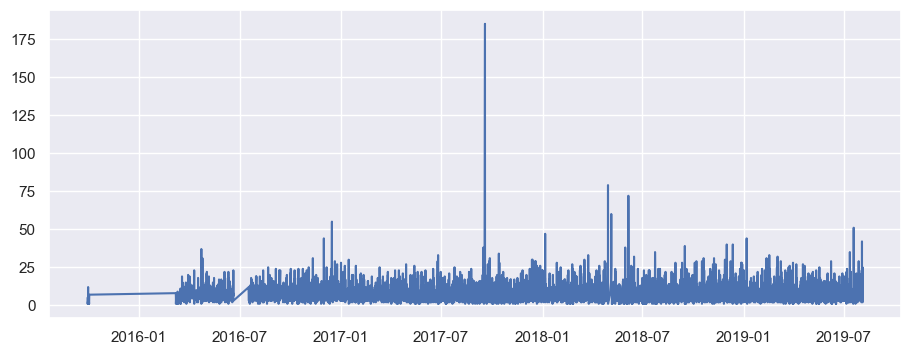

In [34]:
plt.plot(df_grouped['Order Date'], df_grouped['Total products'])

In [35]:
#dropping rows with more than 50 total products
df_grouped.drop(df_grouped.loc[df_grouped['Total products'] > 50].index, inplace=True)

In [36]:
df_grouped.shape

(13063, 6)

<Axes: xlabel='Total products', ylabel='Revenue'>

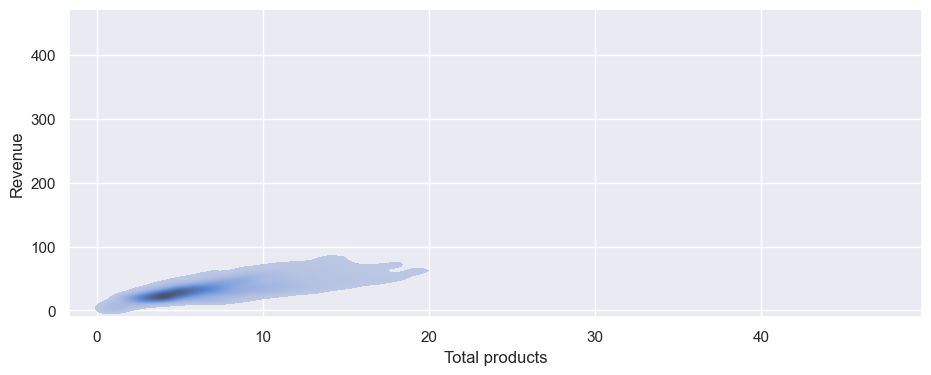

In [37]:

sns.kdeplot(df_grouped, x = 'Total products', y = 'Revenue', fill=True, n_levels=100)

In [38]:

# Custom function to join strings in the "Item Name" column
def join_items(series):
    return ", ".join(series.dropna().astype(str))


# Resampling by week and applying the custom function to "Item Name"
dfgweek = df_grouped.resample('W', on='Order Date').agg({
    'Item Name': join_items,  # Custom aggregation for strings
    'Quantity': 'sum',       # Sum for numerical columns
    'Total products': 'sum', # Example for summing another column
    'PriceArray': 'sum',
    'Revenue': 'sum'         # Sum for revenue
}).reset_index()

# dfgday = df_grouped.resample('D', on='Order Date').sum().reset_index()
# dfgweek = df_grouped.resample('W', on='Order Date').sum().reset_index()
# dfgmonth = df_grouped.resample('ME', on='Order Date').sum().reset_index()
# dfgquarter = df_grouped.resample('QE', on='Order Date').sum().reset_index()
# dfgyear = df_grouped.resample('YE', on='Order Date').sum().reset_index()


In [39]:
dfgweek

,Order Date,Item Name,Quantity,Total products,PriceArray,Revenue
0,2015-10-04,"Chicken Tikka, Tandoori Chicken (1/4), Chicken...","[1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, ...",70,"[7.95, 4.95, 7.95, 4.95, 5.95, 4.95, 5.95, 4.9...",385.00
1,2015-10-11,,0,0,0,0.00
2,2015-10-18,,0,0,0,0.00
3,2015-10-25,,0,0,0,0.00
4,2015-11-01,,0,0,0,0.00
...,...,...,...,...,...,...
196,2019-07-07,"Chicken Tikka Masala, Pilau Rice, Saag Aloo, P...","[2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 3, 3, 2, ...",792,"[8.95, 2.95, 5.95, 2.95, 3.95, 9.95, 3.95, 2.9...",3652.10
197,2019-07-14,"Curry - Lamb, Korma - Chicken, Plain Rice, Chi...","[1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...",598,"[7.95, 8.95, 2.95, 8.95, 8.95, 3.95, 2.95, 8.9...",2796.15
198,2019-07-21,"Vindaloo - Lamb, Saag Bhajee, Tandoori Mixed G...","[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, ...",774,"[7.95, 5.95, 11.95, 9.95, 5.95, 0.5, 0.5, 0.5,...",3631.25
199,2019-07-28,"Persian Lamb Biryani, Plain Papadum, Curry Sau...","[1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...",785,"[10.95, 0.8, 3.95, 4.95, 2.95, 2.95, 9.95, 4.9...",3653.10


In [40]:
dfgweek.loc[69,'Order Date']

Timestamp('2017-01-29 00:00:00')

<Axes: xlabel='Order Date', ylabel='Total products'>

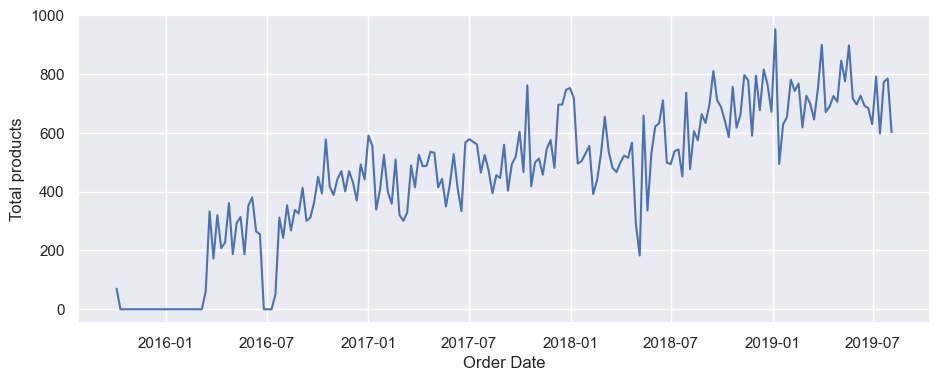

In [41]:
sns.lineplot(data=dfgweek, x='Order Date', y='Total products')

In [42]:
from transformer import Transformer
import torch


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/sandeephugar/VSCProjects/predinventory/venv/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/sandeephugar/VSCProjects/predinventory/venv/lib/python3

In [43]:
START_TOKEN = ' '
END_TOKEN = '.'
PADDING_TOKEN = '|'

index_to_time = dfgweek.loc[:,'Order Date'].astype(str).to_dict()
print(index_to_time)

index_to_obj = dfd.loc[:, "Item Name"].to_dict()

lt = len(index_to_time.keys())
lo = len(index_to_obj.keys())

index_to_obj[lo] = START_TOKEN
index_to_obj[lo + 1] = END_TOKEN
index_to_obj[lo + 2] = PADDING_TOKEN
index_to_obj[lo + 3] = '0'

index_to_time[lt] = START_TOKEN
index_to_time[lt + 1] = END_TOKEN
index_to_time[lt + 2] = PADDING_TOKEN




{0: '2015-10-04', 1: '2015-10-11', 2: '2015-10-18', 3: '2015-10-25', 4: '2015-11-01', 5: '2015-11-08', 6: '2015-11-15', 7: '2015-11-22', 8: '2015-11-29', 9: '2015-12-06', 10: '2015-12-13', 11: '2015-12-20', 12: '2015-12-27', 13: '2016-01-03', 14: '2016-01-10', 15: '2016-01-17', 16: '2016-01-24', 17: '2016-01-31', 18: '2016-02-07', 19: '2016-02-14', 20: '2016-02-21', 21: '2016-02-28', 22: '2016-03-06', 23: '2016-03-13', 24: '2016-03-20', 25: '2016-03-27', 26: '2016-04-03', 27: '2016-04-10', 28: '2016-04-17', 29: '2016-04-24', 30: '2016-05-01', 31: '2016-05-08', 32: '2016-05-15', 33: '2016-05-22', 34: '2016-05-29', 35: '2016-06-05', 36: '2016-06-12', 37: '2016-06-19', 38: '2016-06-26', 39: '2016-07-03', 40: '2016-07-10', 41: '2016-07-17', 42: '2016-07-24', 43: '2016-07-31', 44: '2016-08-07', 45: '2016-08-14', 46: '2016-08-21', 47: '2016-08-28', 48: '2016-09-04', 49: '2016-09-11', 50: '2016-09-18', 51: '2016-09-25', 52: '2016-10-02', 53: '2016-10-09', 54: '2016-10-16', 55: '2016-10-23', 5

In [44]:
index_to_obj.values()

dict_values(['Onion Bhaji', 'Chicken Tikka', 'Tandoori Chicken (1/4)', 'Vegetable Samosa', 'Tandoori Fish', 'Royal Paneer', 'Prawn Puree', 'Chicken Sylhet', 'Vegetable Balti', 'Vegetable Karahi', 'Sheek Kehab', 'Onion Chutney', 'Mint Sauce', 'Lime Pickle', 'Paratha', 'Kurma', 'COBRA (330ML)', 'Lamb Persian', 'Spicy Papadum', 'Tandoori Chicken', 'Cauliflower Bhajee', 'Chicken Pakora', 'Lemon Rice', 'COBRA (660ML)', 'Coke 1.5 ltr', 'House Red wine 75cl', 'Green Salad', 'French Fries', 'Chicken Tikka (Main)', 'Sheek Kebab (Main)', 'Bengal Salad', 'Chicken Haryali', 'Onion Bhajee', 'Aloo Chaat', 'Meat Samosa', 'Vegetable Roll', 'Lamb Tikka (Main)', 'Onion Naan', 'Chapati', 'Stuffed Paratha', 'Puree', 'Chicken Tikka Masala', 'Chicken Tikka Karahi', 'Madras', 'Plain Rice', 'Pilau Rice', 'Lamb Shashlick', 'Chicken Chaat', 'Saag Rice', 'Plain Naan', 'Plain Papadum', 'Keema Naan', 'Curry', 'Bombay Aloo', 'Tandoori Mixed Grill', 'Hazary Lamb', 'Egg Rice', 'Garlic Naan', 'Garlic Rice', 'Dupiaza',

In [45]:
time_to_index = {v: k for k, v in index_to_time.items()}
obj_to_index = {v: k for k, v in index_to_obj.items()}

In [46]:
print(time_to_index)

{'2015-10-04': 0, '2015-10-11': 1, '2015-10-18': 2, '2015-10-25': 3, '2015-11-01': 4, '2015-11-08': 5, '2015-11-15': 6, '2015-11-22': 7, '2015-11-29': 8, '2015-12-06': 9, '2015-12-13': 10, '2015-12-20': 11, '2015-12-27': 12, '2016-01-03': 13, '2016-01-10': 14, '2016-01-17': 15, '2016-01-24': 16, '2016-01-31': 17, '2016-02-07': 18, '2016-02-14': 19, '2016-02-21': 20, '2016-02-28': 21, '2016-03-06': 22, '2016-03-13': 23, '2016-03-20': 24, '2016-03-27': 25, '2016-04-03': 26, '2016-04-10': 27, '2016-04-17': 28, '2016-04-24': 29, '2016-05-01': 30, '2016-05-08': 31, '2016-05-15': 32, '2016-05-22': 33, '2016-05-29': 34, '2016-06-05': 35, '2016-06-12': 36, '2016-06-19': 37, '2016-06-26': 38, '2016-07-03': 39, '2016-07-10': 40, '2016-07-17': 41, '2016-07-24': 42, '2016-07-31': 43, '2016-08-07': 44, '2016-08-14': 45, '2016-08-21': 46, '2016-08-28': 47, '2016-09-04': 48, '2016-09-11': 49, '2016-09-18': 50, '2016-09-25': 51, '2016-10-02': 52, '2016-10-09': 53, '2016-10-16': 54, '2016-10-23': 55, '

In [47]:
time_train = list(dfgweek.loc[:,'Order Date'].astype(str))

In [48]:
time_train[0]

'2015-10-04'

In [49]:
index_to_time

{0: '2015-10-04',
 1: '2015-10-11',
 2: '2015-10-18',
 3: '2015-10-25',
 4: '2015-11-01',
 5: '2015-11-08',
 6: '2015-11-15',
 7: '2015-11-22',
 8: '2015-11-29',
 9: '2015-12-06',
 10: '2015-12-13',
 11: '2015-12-20',
 12: '2015-12-27',
 13: '2016-01-03',
 14: '2016-01-10',
 15: '2016-01-17',
 16: '2016-01-24',
 17: '2016-01-31',
 18: '2016-02-07',
 19: '2016-02-14',
 20: '2016-02-21',
 21: '2016-02-28',
 22: '2016-03-06',
 23: '2016-03-13',
 24: '2016-03-20',
 25: '2016-03-27',
 26: '2016-04-03',
 27: '2016-04-10',
 28: '2016-04-17',
 29: '2016-04-24',
 30: '2016-05-01',
 31: '2016-05-08',
 32: '2016-05-15',
 33: '2016-05-22',
 34: '2016-05-29',
 35: '2016-06-05',
 36: '2016-06-12',
 37: '2016-06-19',
 38: '2016-06-26',
 39: '2016-07-03',
 40: '2016-07-10',
 41: '2016-07-17',
 42: '2016-07-24',
 43: '2016-07-31',
 44: '2016-08-07',
 45: '2016-08-14',
 46: '2016-08-21',
 47: '2016-08-28',
 48: '2016-09-04',
 49: '2016-09-11',
 50: '2016-09-18',
 51: '2016-09-25',
 52: '2016-10-02',
 53

In [50]:
len(time_train)

201

In [51]:
# obj_train = []

# for row in dfgweek.iterrows():
#     temp = row['Item Name'].split(",").join("")
#     obj_train.append(temp)
    

In [110]:
dfgweek.loc[:, "Item Name"]

0      Chicken Tikka, Tandoori Chicken (1/4), Chicken...
1                                                       
2                                                       
3                                                       
4                                                       
                             ...                        
196    Chicken Tikka Masala, Pilau Rice, Saag Aloo, P...
197    Curry - Lamb, Korma - Chicken, Plain Rice, Chi...
198    Vindaloo - Lamb, Saag Bhajee, Tandoori Mixed G...
199    Persian Lamb Biryani, Plain Papadum, Curry Sau...
200    Korma - Chicken, Mint Sauce, Plain Rice, Chick...
Name: Item Name, Length: 201, dtype: object

In [52]:
obj_train = list(dfgweek.loc[:, "Item Name"].astype(str))


In [53]:
for i in range(len(obj_train)):
    if type(obj_train[i]) is int:
        print(obj_train[i])

In [109]:
obj_train

['Chicken Tikka, Tandoori Chicken (1/4), Chicken Tikka, Vegetable Samosa, Tandoori Fish, Vegetable Samosa, Tandoori Fish, Tandoori Chicken (1/4), Vegetable Samosa, Onion Bhaji, Royal Paneer, Prawn Puree, Tandoori Chicken (1/4), Vegetable Samosa, Tandoori Fish, Vegetable Samosa, Tandoori Fish, Royal Paneer, Onion Bhaji, Tandoori Chicken (1/4), Vegetable Samosa, Tandoori Fish, Chicken Sylhet, Tandoori Fish, Vegetable Samosa, Tandoori Chicken (1/4), Vegetable Samosa, Vegetable Samosa, Tandoori Chicken (1/4), Vegetable Balti, Vegetable Karahi, Tandoori Fish, Sheek Kehab, Onion Bhaji, Onion Bhaji, Onion Chutney, Mint Sauce, Lime Pickle, Paratha, Onion Bhaji, Kurma, Vegetable Samosa, Onion Bhaji, COBRA (330ML), Onion Bhaji, Lamb Persian, Spicy Papadum, Tandoori Chicken, Cauliflower Bhajee, Chicken Pakora, Onion Bhaji, Lemon Rice, Paratha, COBRA (660ML), Coke 1.5 ltr, Tandoori Chicken (1/4), Vegetable Samosa, House Red wine 75cl',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '

In [55]:
obj_to_index

{'Onion Bhaji': 0,
 'Chicken Tikka': 1,
 'Tandoori Chicken (1/4)': 2,
 'Vegetable Samosa': 3,
 'Tandoori Fish': 4,
 'Royal Paneer': 5,
 'Prawn Puree': 6,
 'Chicken Sylhet': 7,
 'Vegetable Balti': 8,
 'Vegetable Karahi': 9,
 'Sheek Kehab': 10,
 'Onion Chutney': 11,
 'Mint Sauce': 12,
 'Lime Pickle': 13,
 'Paratha': 14,
 'Kurma': 15,
 'COBRA (330ML)': 16,
 'Lamb Persian': 17,
 'Spicy Papadum': 18,
 'Tandoori Chicken': 19,
 'Cauliflower Bhajee': 20,
 'Chicken Pakora': 21,
 'Lemon Rice': 22,
 'COBRA (660ML)': 23,
 'Coke 1.5 ltr': 24,
 'House Red wine 75cl': 25,
 'Green Salad': 26,
 'French Fries': 27,
 'Chicken Tikka (Main)': 28,
 'Sheek Kebab (Main)': 29,
 'Bengal Salad': 30,
 'Chicken Haryali': 31,
 'Onion Bhajee': 32,
 'Aloo Chaat': 33,
 'Meat Samosa': 34,
 'Vegetable Roll': 35,
 'Lamb Tikka (Main)': 36,
 'Onion Naan': 37,
 'Chapati': 38,
 'Stuffed Paratha': 39,
 'Puree': 40,
 'Chicken Tikka Masala': 41,
 'Chicken Tikka Karahi': 42,
 'Madras': 43,
 'Plain Rice': 44,
 'Pilau Rice': 45,
 

In [123]:
d_model = 64
batch_size = 1
ffn_hidden = 256
num_heads = 8
drop_prob = 0.1
num_layers = 12
max_sequence_length = 100
obj_size = len(obj_to_index)

transformer = Transformer(d_model,
                          ffn_hidden,
                          num_heads,
                          drop_prob,
                          num_layers,
                          max_sequence_length,
                          obj_size,
                          time_to_index,
                          obj_to_index,
                          START_TOKEN,
                          END_TOKEN,
                          PADDING_TOKEN)

In [124]:
transformer

Transformer(
  (encoder): Encoder(
    (sentence_embedding): SentenceEmbedding(
      (embedding): Embedding(204, 64)
      (position_encoder): PositionalEncoding()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): SequentialEncoder(
      (0): EncoderLayer(
        (attention): MultiHeadAttention(
          (qkv_layer): Linear(in_features=64, out_features=192, bias=True)
          (linear_layer): Linear(in_features=64, out_features=64, bias=True)
        )
        (norm1): LayerNormalization()
        (dropout1): Dropout(p=0.1, inplace=False)
        (ffn): PositionwiseFeedForward(
          (linear1): Linear(in_features=64, out_features=256, bias=True)
          (linear2): Linear(in_features=256, out_features=64, bias=True)
          (relu): ReLU()
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (norm2): LayerNormalization()
        (dropout2): Dropout(p=0.1, inplace=False)
      )
      (1): EncoderLayer(
        (attention): MultiHeadAttention(

In [125]:
from torch.utils.data import Dataset, DataLoader

class ItemDataset(Dataset):
    def __init__(self, time_train, obj_train):
        self.time_train = time_train
        self.obj_train = obj_train

    def __len__(self):
        return len(self.time_train)
    
    def __getitem__(self, idx):
        return self.time_train[idx], self.obj_train[idx]

In [126]:
dataset = ItemDataset(time_train, obj_train)

In [127]:
len(dataset)

201

In [128]:
dataset[0]

('2015-10-04',
 'Chicken Tikka, Tandoori Chicken (1/4), Chicken Tikka, Vegetable Samosa, Tandoori Fish, Vegetable Samosa, Tandoori Fish, Tandoori Chicken (1/4), Vegetable Samosa, Onion Bhaji, Royal Paneer, Prawn Puree, Tandoori Chicken (1/4), Vegetable Samosa, Tandoori Fish, Vegetable Samosa, Tandoori Fish, Royal Paneer, Onion Bhaji, Tandoori Chicken (1/4), Vegetable Samosa, Tandoori Fish, Chicken Sylhet, Tandoori Fish, Vegetable Samosa, Tandoori Chicken (1/4), Vegetable Samosa, Vegetable Samosa, Tandoori Chicken (1/4), Vegetable Balti, Vegetable Karahi, Tandoori Fish, Sheek Kehab, Onion Bhaji, Onion Bhaji, Onion Chutney, Mint Sauce, Lime Pickle, Paratha, Onion Bhaji, Kurma, Vegetable Samosa, Onion Bhaji, COBRA (330ML), Onion Bhaji, Lamb Persian, Spicy Papadum, Tandoori Chicken, Cauliflower Bhajee, Chicken Pakora, Onion Bhaji, Lemon Rice, Paratha, COBRA (660ML), Coke 1.5 ltr, Tandoori Chicken (1/4), Vegetable Samosa, House Red wine 75cl')

In [129]:
train_loader = DataLoader(dataset, batch_size)
iterator = iter(train_loader)

In [130]:
for batch_num, batch in enumerate(iterator):
    print(batch)

[('2015-10-04',), ('Chicken Tikka, Tandoori Chicken (1/4), Chicken Tikka, Vegetable Samosa, Tandoori Fish, Vegetable Samosa, Tandoori Fish, Tandoori Chicken (1/4), Vegetable Samosa, Onion Bhaji, Royal Paneer, Prawn Puree, Tandoori Chicken (1/4), Vegetable Samosa, Tandoori Fish, Vegetable Samosa, Tandoori Fish, Royal Paneer, Onion Bhaji, Tandoori Chicken (1/4), Vegetable Samosa, Tandoori Fish, Chicken Sylhet, Tandoori Fish, Vegetable Samosa, Tandoori Chicken (1/4), Vegetable Samosa, Vegetable Samosa, Tandoori Chicken (1/4), Vegetable Balti, Vegetable Karahi, Tandoori Fish, Sheek Kehab, Onion Bhaji, Onion Bhaji, Onion Chutney, Mint Sauce, Lime Pickle, Paratha, Onion Bhaji, Kurma, Vegetable Samosa, Onion Bhaji, COBRA (330ML), Onion Bhaji, Lamb Persian, Spicy Papadum, Tandoori Chicken, Cauliflower Bhajee, Chicken Pakora, Onion Bhaji, Lemon Rice, Paratha, COBRA (660ML), Coke 1.5 ltr, Tandoori Chicken (1/4), Vegetable Samosa, House Red wine 75cl',)]
[('2015-10-11',), ('',)]
[('2015-10-18',),

In [131]:
obj_to_index

{'Onion Bhaji': 0,
 'Chicken Tikka': 1,
 'Tandoori Chicken (1/4)': 2,
 'Vegetable Samosa': 3,
 'Tandoori Fish': 4,
 'Royal Paneer': 5,
 'Prawn Puree': 6,
 'Chicken Sylhet': 7,
 'Vegetable Balti': 8,
 'Vegetable Karahi': 9,
 'Sheek Kehab': 10,
 'Onion Chutney': 11,
 'Mint Sauce': 12,
 'Lime Pickle': 13,
 'Paratha': 14,
 'Kurma': 15,
 'COBRA (330ML)': 16,
 'Lamb Persian': 17,
 'Spicy Papadum': 18,
 'Tandoori Chicken': 19,
 'Cauliflower Bhajee': 20,
 'Chicken Pakora': 21,
 'Lemon Rice': 22,
 'COBRA (660ML)': 23,
 'Coke 1.5 ltr': 24,
 'House Red wine 75cl': 25,
 'Green Salad': 26,
 'French Fries': 27,
 'Chicken Tikka (Main)': 28,
 'Sheek Kebab (Main)': 29,
 'Bengal Salad': 30,
 'Chicken Haryali': 31,
 'Onion Bhajee': 32,
 'Aloo Chaat': 33,
 'Meat Samosa': 34,
 'Vegetable Roll': 35,
 'Lamb Tikka (Main)': 36,
 'Onion Naan': 37,
 'Chapati': 38,
 'Stuffed Paratha': 39,
 'Puree': 40,
 'Chicken Tikka Masala': 41,
 'Chicken Tikka Karahi': 42,
 'Madras': 43,
 'Plain Rice': 44,
 'Pilau Rice': 45,
 

In [132]:
len(index_to_time)

204

In [133]:
len(time_to_index)

204

In [134]:
from torch import nn

criterion = nn.CrossEntropyLoss(ignore_index=obj_to_index[PADDING_TOKEN], reduction='none')

for params in transformer.parameters():
    if params.dim() > 1:
        nn.init.xavier_uniform_(params)

optim = torch.optim.Adam(transformer.parameters(), lr=1e-4)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


In [135]:
NEG_INFTY = -1e9

def create_masks(time_batch, item_batch):
    print(len(time_batch))
    print(len(item_batch))
    num_sentences = len(time_batch)
    look_ahead_mask = torch.full([max_sequence_length, max_sequence_length], True)
    look_ahead_mask = torch.triu(look_ahead_mask, diagonal=1)
    encoder_padding_mask = torch.full([num_sentences, max_sequence_length, max_sequence_length], False)
    decoder_padding_mask_self_attention = torch.full([num_sentences, max_sequence_length, max_sequence_length], False)
    decoder_padding_mask_cross_attention = torch.full([num_sentences, max_sequence_length, max_sequence_length], False)

    for idx in range(num_sentences):
        time_len = len(time_batch[idx])
        item_len = len(item_batch[idx].split(", "))  # Split by ", " and count the items
        print(f" {max_sequence_length} {time_len} {item_len}")
        time_to_padding_mask = torch.arange(time_len + 1, max_sequence_length)
        item_to_padding_mask = torch.arange(item_len + 1, max_sequence_length)
        encoder_padding_mask[idx, :, time_to_padding_mask] = True
        encoder_padding_mask[idx, time_to_padding_mask, :] = True
        decoder_padding_mask_self_attention[idx, :, item_to_padding_mask] = True
        decoder_padding_mask_self_attention[idx, item_to_padding_mask, :] = True
        decoder_padding_mask_cross_attention[idx, :, time_to_padding_mask] = True
        decoder_padding_mask_cross_attention[idx, item_to_padding_mask, :] = True

    encoder_self_attention_mask = torch.where(encoder_padding_mask, NEG_INFTY, 0.0)
    decoder_self_attention_mask = torch.where(look_ahead_mask + decoder_padding_mask_self_attention, NEG_INFTY, 0.0)
    decoder_cross_attention_mask = torch.where(decoder_padding_mask_cross_attention, NEG_INFTY, 0.0)
    return encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask

In [136]:
transformer.train()
transformer.to(device)
total_loss = 0
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch}")
    iterator = iter(train_loader)
    for batch_num, batch in enumerate(iterator):
        transformer.train()
        time_batch, item_batch = batch
        encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask = create_masks(time_batch, item_batch)
        optim.zero_grad()
        item_predictions = transformer(time_batch,
                                       item_batch,
                                       encoder_self_attention_mask.to(device),
                                       decoder_self_attention_mask.to(device),
                                       decoder_cross_attention_mask.to(device),
                                       enc_start_token = False,
                                       enc_end_token=False,
                                       dec_start_token=True,
                                       dec_end_token=True)
        labels = transformer.decoder.sentence_embedding.batch_tokenize(item_batch, start_token=False, end_token=True)
        loss = criterion(item_predictions.view(-1, obj_size).to(device),
                         labels.view(-1).to(device)).to(device)
        valid_indicies = torch.where(labels.view(-1) == obj_to_index[PADDING_TOKEN], False, True)
        loss = loss.sum() / valid_indicies.sum()
        loss.backward()
        optim.step()

        if True:
            print(f"Iteration {batch_num} : {loss.item()}")
            print(f"Week: {time_batch[0]}")
            print(f"Items: {item_batch[0]}")
            item_sentence_predicted = torch.argmax(item_predictions[0], axis=1)
            predicted_sentence = ""
            for idx in item_sentence_predicted:
                if idx == obj_to_index[END_TOKEN]:
                    break
                predicted_sentence += index_to_obj[idx.item()]
                predicted_sentence += ", "
                
            print(f"Item Prediction: {predicted_sentence}")


            transformer.eval()
            item_sentence = ("",)
            time_sentence = ('2017-01-29',)
            for word_counter in range(max_sequence_length):
                encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask = create_masks(time_sentence, item_sentence)
                predictions = transformer(time_sentence,
                                          item_sentence,
                                          encoder_self_attention_mask.to(device),
                                          decoder_self_attention_mask.to(device),
                                          decoder_cross_attention_mask.to(device),
                                          enc_start_token=False,
                                          enc_end_token=False,
                                          dec_start_token=True,
                                          dec_end_token=False)
                next_token_prob_distribution = predictions[0][word_counter]
                next_token_index = torch.argmax(next_token_prob_distribution).item()
                next_token = index_to_obj[next_token_index]
                item_sentence = (item_sentence[0] + next_token, )
                if next_token == END_TOKEN:
                    break

            print(f"Testing (2017-01-29): {item_sentence}")
            print("--------------------------------------------------------------------------------")


Epoch 0
1
1
 100 10 58
Iteration 0 : 5.7953362464904785
Week: 2015-10-04
Items: Chicken Tikka, Tandoori Chicken (1/4), Chicken Tikka, Vegetable Samosa, Tandoori Fish, Vegetable Samosa, Tandoori Fish, Tandoori Chicken (1/4), Vegetable Samosa, Onion Bhaji, Royal Paneer, Prawn Puree, Tandoori Chicken (1/4), Vegetable Samosa, Tandoori Fish, Vegetable Samosa, Tandoori Fish, Royal Paneer, Onion Bhaji, Tandoori Chicken (1/4), Vegetable Samosa, Tandoori Fish, Chicken Sylhet, Tandoori Fish, Vegetable Samosa, Tandoori Chicken (1/4), Vegetable Samosa, Vegetable Samosa, Tandoori Chicken (1/4), Vegetable Balti, Vegetable Karahi, Tandoori Fish, Sheek Kehab, Onion Bhaji, Onion Bhaji, Onion Chutney, Mint Sauce, Lime Pickle, Paratha, Onion Bhaji, Kurma, Vegetable Samosa, Onion Bhaji, COBRA (330ML), Onion Bhaji, Lamb Persian, Spicy Papadum, Tandoori Chicken, Cauliflower Bhajee, Chicken Pakora, Onion Bhaji, Lemon Rice, Paratha, COBRA (660ML), Coke 1.5 ltr, Tandoori Chicken (1/4), Vegetable Samosa, House 

RuntimeError: upper bound and larger bound inconsistent with step sign

In [ ]:
item_batch

('Chicken Tikka, Tandoori Chicken (1/4), Chicken Tikka, Vegetable Samosa, Tandoori Fish, Vegetable Samosa, Tandoori Fish, Tandoori Chicken (1/4), Vegetable Samosa, Onion Bhaji, Royal Paneer, Prawn Puree, Tandoori Chicken (1/4), Vegetable Samosa, Tandoori Fish, Vegetable Samosa, Tandoori Fish, Royal Paneer, Onion Bhaji, Tandoori Chicken (1/4), Vegetable Samosa, Tandoori Fish, Chicken Sylhet, Tandoori Fish, Vegetable Samosa, Tandoori Chicken (1/4), Vegetable Samosa, Vegetable Samosa, Tandoori Chicken (1/4), Vegetable Balti, Vegetable Karahi, Tandoori Fish, Sheek Kehab, Onion Bhaji, Onion Bhaji, Onion Chutney, Mint Sauce, Lime Pickle, Paratha, Onion Bhaji, Kurma, Vegetable Samosa, Onion Bhaji, COBRA (330ML), Onion Bhaji, Lamb Persian, Spicy Papadum, Tandoori Chicken, Cauliflower Bhajee, Chicken Pakora, Onion Bhaji, Lemon Rice, Paratha, COBRA (660ML), Coke 1.5 ltr, Tandoori Chicken (1/4), Vegetable Samosa, House Red wine 75cl',)